# **Actividad guiada nro 4 - Parte 2**
#### _Minería de datos_

Utilizando el [set de datos](https://drive.google.com/open?id=1Xvv4Vh_LscBP_jcTP46kJ2D0KLZveFJs) de la [primera parte de la actividad 4](https://colab.research.google.com/drive/1YUYNpV9HSPY7vlxtE2O9oPE6OL8VBMa5?usp=sharing) seguiremos el flujo de trabajo básico para el entrenamiento de nuestro primer modelo de Machine Learning utilizando [Scikit-learn](https://scikit-learn.org/stable/index.html).

En actividades anteriores hemos visto que uno de los primeros pasos del proceso de Machine Learning es una exploración de datos y los beneficios que conlleva, desde simplemente visualizar un dataframe, hasta histogramas y visualizaciones que nos permiten tener una idea más clara sobre los datos.

De este proceso podemos rescatar:
- inspeccionar los valores de las _características/atributos_ puede ayudarnos a **identificar si requieren de mayor procesamiento o limpieza**.
- es posible que existan **datos nulos, erróneos, o que sean inconsistentes** con:
  - el tipo de dato utilizado en la columna
  - uso incorrecto de unidades de medida
  - no hay suficientes ejemplos de una clase en particular
- Es posible que en esta etapa nos demos cuenta que **el problema que queremos resolver no requiere del uso de Machine Learning**.

### **A continuación aprenderemos cómo un algoritmo de clasificación es capaz de predecir el tipo de fruta basado en atributos como: el color, el peso y el tamaño, entre otros.**

![GIF](https://drive.google.com/uc?id=1dZFUPum5aY9gPZ9LRDH-7F_0fklevGT1)



In [ ]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# importa dataset y crea un DataFrame
fruits = pd.read_table('fruit_data_with_colors.txt')

In [ ]:
# exploramos los datos
fruits.tail(20)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
39,3,orange,turkey_navel,144,6.8,7.4,0.75
40,3,orange,turkey_navel,154,7.1,7.5,0.78
41,3,orange,turkey_navel,180,7.6,8.2,0.79
42,3,orange,turkey_navel,154,7.2,7.2,0.82
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72
48,4,lemon,spanish_belsan,174,7.3,10.1,0.72


In [ ]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

La clasificación es el proceso de **predecir la _clase_** en base a una serie de datos. Las _clases_ son usualmente llamadas/referidas como etiquetas o categorías. La _clase_ nos permite identificar a un grupo de datos que tienen relación entre sí.

### **¿Qué clases podríamos utilizar del dataset para la clasificación de frutas por parte del modelo de Machine Learning? o en otras palabras ¿cómo identificamos a una fruta?** 

In [ ]:
# realiza un mapeo entre la etiqueta y el nombre de la fruta, para interpretar
# de mejor forma los resultados 
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### **¿Qué atributos/características podemos identificar en el dataset para el entramiento del modelo de Machine Learning?** 

El archivo contiene la **masa, altura y ancho** de una selección de frutas: naranjas, limones, manzanas. La altura fue medida desde el centro de la fruta. El ancho corresponde a la parte más 'ancha' perpendicular a la altura.

# Exa**minando** los datos

[Diagrama de dispersión / Correlación - Referencia 1](https://www.youtube.com/watch?v=KwtuSe1JAVQ)

[Diagrama de dispersión / Correlación - Referencia 2](https://www.youtube.com/watch?v=rv0Xy8edFRg)

[Regresión y Correlación](https://www.youtube.com/watch?v=HL7yhjy9Av0)

### **Feature pair plot**

Gráfico que permite visualizar la relación de los datos en base a las _características_, identificando diversos clusters/grupos. 

En este caso particular, será útil para identificar si una característica está relacionada a otra o no (en pares -> ej: 'height' - 'color_score') (_correlación_). Cada punto representa una fruta y su color a la clase que corresponde. La posición de cada punto corresponde al par de valores de las características. ejemplo: 'height' , 'color_score' -> puntos (x , y).

Los histogramas presentes (diagonal), muestran la distribución de los valores de cada una de las características.

**->** Nótese que el siguiente gráfico no muestra las interacciones de _todas_ las características de las clases, sino sólo en _pares_.

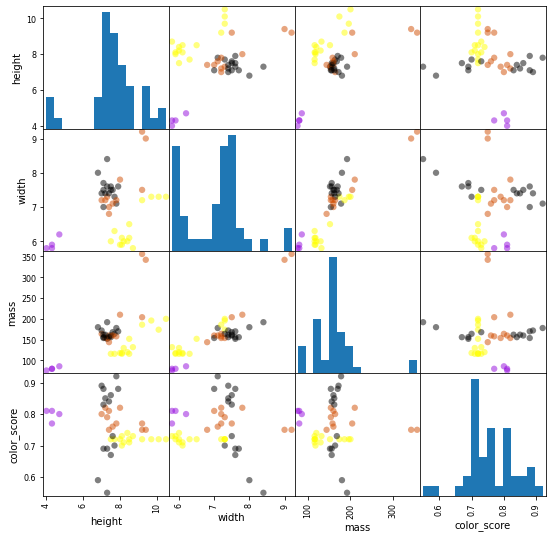

In [ ]:
# crea un gráfico de tipo scatter matrix / diagrama de dispersión + histogramas
from matplotlib import cm
from pandas.plotting import scatter_matrix

# X: características/atributos por los cuales el modelo será entrenado (aprenderá)
# y: clase, la cual será predecida por el modelo
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

# dividimos el dataset entre de datos de entrenamiento y test (evaluación)
# proporción del set de datos de entrenamiento (75%) del total
# proporción del set de datos de testing/evaluación (25%) del total
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# generamos gráfico de tipo scatter matrix (diagrama de dispersión + histogramas)
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

### **Describiendo una visualización**

- Beneficios de la anterior visualización:
  - obtener una idea de los rangos que los valores de las características/atributos toman/poseen. Con esto podemos identificar datos que se escapan de los rangos _normales_, lo que podría ser un indicador de: _ruido_, una característica ausente o algún otro tipo de problema con el dataset.
  - tener una mejor idea acerca de qué tan probable es que un algoritmo de ML obtenga buenos resultados prediciendo las diferentes clases ('apple', 'mandarin', 'orange', 'lemon'). 


**Feature space** / **Espacio de características**

Se refiere a la representación de un objeto utilizando características específicas, las cuales se alojan en alguna de las columnas del dataset. En este caso por ejemplo, las caracteríticas de la etiqueta 'lemon' tienden a agruparse entre sí, generando su propio _espacio_. Por el contrario, las características de etiquetas diferentes como 'lemon' y 'apple' tenderán (en este caso específico) a ocupar un espacio distinto, lo que visualmente podemos comprobar con el gráfico cuando **los puntos/datos de las características ocupan un área específica**.

Por ende, cuando se trabaja con un dataset cuyas clases están bien definidas y separadas en el espacio de características, es una buena indicación de que el algoritmo de clasificación podría predecir las clases desde sus características/atributos con alta/buena precisión.

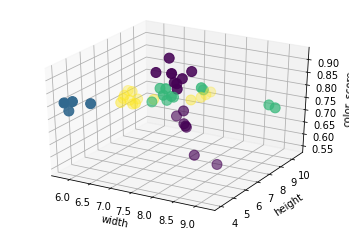

In [ ]:
# Graficando la dispersión en 3D
from mpl_toolkits.mplot3d import Axes3D

# graficamos para visualizar la posible relación entre ancho (width), 
# altura (height), color (color_score) que posee una fruta, cada una de las 
# variables representa una dimensión en el espacio x, y, z
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width') # x
ax.set_ylabel('height') # y
ax.set_zlabel('color_score') # z
plt.show()

En el anterior gráfico se muestra la relación/interacción de 3 características por clase, donde cada punto es una fruta y su color corresponde a su clase ('apple', 'mandarin', 'orange', 'lemon').

### **Creando los sets de datos de entrenamiento y test**

#### _En este ejemplo utilizamos la masa, ancho y altura de las frutas como atributos/características/propiedades que serán utilizadas para entrenar nuestro modelo y luego pueda identificar una fruta a través de estas características_


La **separación** del grupo de datos en **sets de entrenamiento y testing** es un paso muy **importante**, ya que evita que nuestro modelo sea entrenado de forma incorrecta. Si omitimos este paso, el modelo que ha sido entrenado con sólo 1 set de datos probablemente no tenga buenos resultados y no [_generalize_](https://iartificial.net/generalizacion-en-machine-learning/) sus predicciones frente a nuevos set de datos.

Si quieres saber más al respecto [mira aquí](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)


In [ ]:

X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# por defecto la proporción entre el set de datos de entrenamiento y testing es
# de 75% / 25%  respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# referencia función train_test_split() -> https://www.interactivechaos.com/python/function/traintestsplit

In [ ]:
train_test_split?

### **K - Nearest Neighbour (KNN)** 
[k-vecinos más cercanos](https://www.youtube.com/watch?v=ENSHwuJU5sU) 

**->** _procura revisar con atención el video para tener una idea más clara acerca del algoritmo_.

A grandes rasgos el algoritmo clasificador, que puede ser utilizado tanto para tareas de clasificación como de regresión, funciona como ejemplo de lo que se llama: Instance based or Memory Based supervised learning (Algoritmo de aprendizaje supervisado basado en instancias o memoria). Esto quiere decir que el algoritmo se basará en antiguas instancias (memoria), como por ejemplo las etiquetas de cada fruta ('lemon', 'apple'..) que "vió" en el dataset de entrenamiento,  para realizar la clasificación de nuevos objetos. La letra _K_ del algoritmo hace referencia al número de vecinos más próximos, el cual será utilizado para realizar la predicción.







## (Sección opcional si quieres saber más acerca de las fases/pasos que sigue el algoritmo)




### Fases del algoritmo:

Dado un set de datos de entrenamiento **X_train**, con las etiquetas **y_train**, predice la clasificación de la nueva instancia **x_test**.

1) Encuentra las instancias más similares (llamémoslas **X_NN**) en **x_test** que están en **X_train**.

2) Obtiene las etiquetas (**y_NN**) para las instancias similares en **X_NN**.

3) Predice la etiqueta para **x_test** combinando las etiquetas **y_NN**.

#### **Crea el modelo/objeto clasificador**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# crea modelo clasificador de tipo K-NN
# que hará su clasicaficación basándose en los vecinos más cercanos
knn = KNeighborsClassifier(n_neighbors = 5)

#### **Entrena el modelo clasficador usando el data set de entrenamiento**

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Estima la exactitud del clasificador en datos futuros, usando los datos de testing

In [ ]:
knn.score(X_test, y_test)

0.5333333333333333

### Usa el modelo clasificador K-NN para clasificar nuevos objetos no vistos anteriormente 

In [ ]:
# Ejemplo de predición 1
# nueva fruta: datos de fruta de cual no tiene datos (nunca antes 'vista'): masa: 20g, ancho: 4.3 cm, altura: 5.5 cm
# el algoritmo hará una predicción en base a estos datos y retornará la clase de la fruta (o cual cree que es la fruta en base a su entrenamiento) 
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [ ]:
# Ejemplo de predición 1
# nueva fruta: datos de fruta de cual no tiene datos (nunca antes 'vista'): masa: 100g, ancho: 6.3 cm, altura: height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Graficamos los límites de la clasificación por K-NN

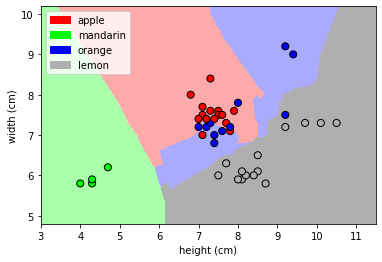

In [ ]:
from adspy_shared_utilities import plot_fruit_knn

# elegimos los 5 vecinos más cercanos
plot_fruit_knn(X_train, y_train, 5, 'uniform')

# eje x: altura de la fruta
# eje y: ancho de la fruta

### **¿Qué tan precisa es la clasificación del algoritmo k-NN según los valores posibles de k?**

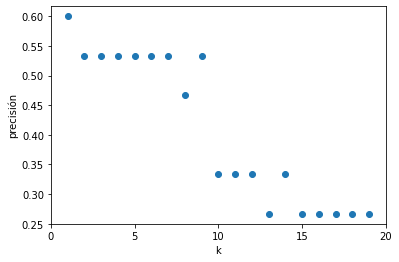

In [ ]:
# extrae la precisión de los modelos entrenados con un rango de valores de K
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('precisión')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

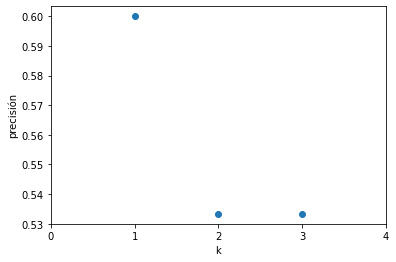

In [ ]:
k_range = range(1,4)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('precisión')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4]);

# ¿Qué valor de k escogerías para entrenar tu modelo?

### **¿Qué tan sensible es la exactitud de clasificación del algoritmo en base a la proporción del set de datos de entrenamiento?**

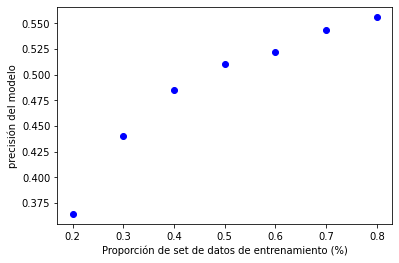

In [ ]:
# proporciones del set de datos de entrenamiento
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# creamos modelo clasificador que aplicará K-NN con los 5 vecinos más próximos
knn = KNeighborsClassifier(n_neighbors = 5)

# graficamos
plt.figure()

# por cada uno de los valores s en t entrenaremos el modelo
for s in t: 
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Proporción de set de datos de entrenamiento (%)')
plt.ylabel('precisión del modelo');

En este gráfico podemos visualizar que a medida el set de datos de entrenamiento aumenta, aumenta también la exactitud de la predicción del modelo, sugiriendo una correlación entre las 2 variables.